# Getting Started

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv('Mall_Customers.csv')

In [3]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# Preprocessing

In [4]:
data.drop('CustomerID', axis=1, inplace=True)

In [5]:
encoder = LabelEncoder()
data['Gender'] = encoder.fit_transform(data['Gender'])

In [7]:
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

In [8]:
scaled_data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,-0.886405,-0.276302,2.268791,1.118061
196,-0.886405,0.441365,2.497807,-0.861839
197,1.128152,-0.491602,2.497807,0.923953
198,1.128152,-0.491602,2.917671,-1.250054


# Clustering

In [9]:
max_clusters = 50

In [15]:
kmeans_tests = [KMeans(n_clusters=i, n_init=10) for i in range(1, max_clusters)]
inertias = [kmeans_tests[i].fit(scaled_data).inertia_ for i in range(len(kmeans_tests))]

C:\Users\VICKY R R\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


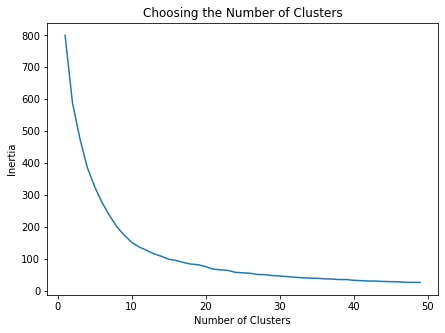

In [16]:
plt.figure(figsize=(7, 5))
plt.plot(range(1, max_clusters), inertias)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Choosing the Number of Clusters")
plt.show()

In [17]:
kmeans = KMeans(n_clusters=10, n_init=10)
kmeans.fit(scaled_data)

KMeans(n_clusters=10)

In [18]:
clusters = kmeans.predict(scaled_data)
clusters

array([7, 7, 8, 0, 8, 0, 8, 0, 2, 0, 2, 0, 8, 0, 8, 7, 8, 7, 2, 0, 7, 7,
       8, 7, 8, 7, 8, 7, 8, 0, 2, 0, 2, 7, 8, 0, 8, 0, 8, 0, 1, 7, 2, 4,
       8, 0, 1, 4, 4, 4, 1, 7, 4, 2, 1, 2, 1, 2, 4, 2, 2, 7, 1, 1, 2, 7,
       1, 1, 7, 4, 2, 1, 1, 1, 2, 7, 1, 7, 4, 1, 2, 7, 2, 1, 4, 2, 1, 4,
       4, 1, 1, 7, 2, 4, 4, 7, 1, 4, 2, 7, 4, 1, 2, 7, 2, 4, 1, 2, 2, 2,
       2, 4, 4, 7, 4, 4, 1, 1, 1, 1, 7, 4, 4, 3, 4, 9, 6, 3, 2, 3, 6, 3,
       4, 9, 6, 9, 5, 3, 6, 9, 5, 3, 4, 9, 6, 3, 6, 9, 5, 3, 6, 3, 5, 9,
       5, 9, 6, 9, 6, 9, 1, 9, 6, 9, 6, 9, 6, 9, 5, 3, 6, 3, 6, 3, 5, 9,
       6, 3, 6, 3, 5, 9, 6, 9, 5, 3, 5, 3, 5, 9, 5, 9, 6, 9, 5, 9, 5, 3,
       6, 3])

# PCA

In [19]:
pca = PCA(n_components=2)

reduced_data = pd.DataFrame(pca.fit_transform(scaled_data), columns=['PC1', 'PC2'])

In [20]:
reduced_data

,PC1,PC2
0,-0.406383,-0.520714
1,-1.427673,-0.367310
2,0.050761,-1.894068
3,-1.694513,-1.631908
4,-0.313108,-1.810483
...,...,...
195,-1.179572,1.324568
196,0.672751,1.221061
197,-0.723719,2.765010
198,0.767096,2.861930


In [21]:
kmeans.cluster_centers_

array([[-0.88640526, -0.96084556, -1.33087991,  1.17778643],
       [-0.88640526,  1.09830638, -0.24158313, -0.04807901],
       [ 1.12815215,  1.43505777, -0.45298304, -0.40195247],
       [ 1.12815215, -0.39989994,  1.01344075,  1.26040667],
       [-0.88640526, -0.78153925, -0.12214217, -0.11957041],
       [-0.88640526,  0.35421988,  1.24912183, -1.14745442],
       [ 1.12815215, -0.02700694,  0.96701244, -1.39716754],
       [ 1.12815215, -0.97602698, -0.73705168,  0.41603773],
       [-0.7425083 ,  0.16967696, -1.31640908, -1.1668652 ],
       [-0.88640526, -0.47793198,  0.97284787,  1.22158511]])

In [22]:
reduced_centers = pca.transform(kmeans.cluster_centers_)
reduced_centers

array([[-1.6696024 , -1.35294268],
       [ 0.58233488, -0.85939176],
       [ 1.5303687 ,  0.17028966],
       [-0.88272588,  1.65431318],
       [-0.662429  , -0.58044771],
       [ 0.81659377,  0.24505923],
       [ 1.19961046,  1.30582744],
       [-0.68838314,  0.28733559],
       [ 0.75229959, -1.61087948],
       [-1.38150389,  0.3644368 ]])

In [23]:
reduced_data['cluster'] = clusters

In [24]:
reduced_data

,PC1,PC2,cluster
0,-0.406383,-0.520714,7
1,-1.427673,-0.367310,7
2,0.050761,-1.894068,8
3,-1.694513,-1.631908,0
4,-0.313108,-1.810483,8
...,...,...,...
195,-1.179572,1.324568,9
196,0.672751,1.221061,5
197,-0.723719,2.765010,3
198,0.767096,2.861930,6


# Data Visualization

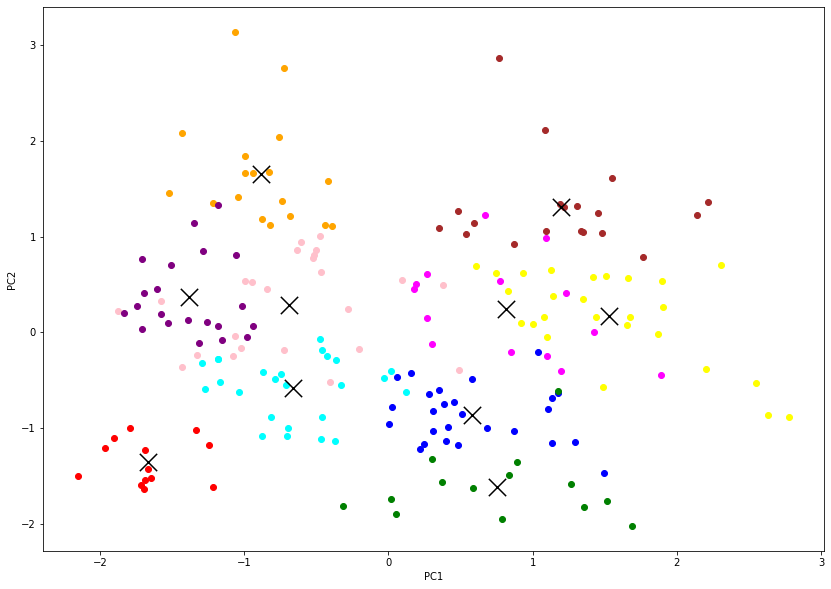

In [25]:
plt.figure(figsize=(14, 10))

plt.scatter(reduced_data[reduced_data['cluster'] == 0].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 0].loc[:, 'PC2'], color='red')
plt.scatter(reduced_data[reduced_data['cluster'] == 1].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 1].loc[:, 'PC2'], color='blue')
plt.scatter(reduced_data[reduced_data['cluster'] == 2].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 2].loc[:, 'PC2'], color='yellow')
plt.scatter(reduced_data[reduced_data['cluster'] == 3].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 3].loc[:, 'PC2'], color='orange')
plt.scatter(reduced_data[reduced_data['cluster'] == 4].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 4].loc[:, 'PC2'], color='cyan')
plt.scatter(reduced_data[reduced_data['cluster'] == 5].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 5].loc[:, 'PC2'], color='magenta')
plt.scatter(reduced_data[reduced_data['cluster'] == 6].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 6].loc[:, 'PC2'], color='brown')
plt.scatter(reduced_data[reduced_data['cluster'] == 7].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 7].loc[:, 'PC2'], color='pink')
plt.scatter(reduced_data[reduced_data['cluster'] == 8].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 8].loc[:, 'PC2'], color='green')
plt.scatter(reduced_data[reduced_data['cluster'] == 9].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 9].loc[:, 'PC2'], color='purple')

plt.scatter(reduced_centers[:, 0], reduced_centers[:, 1], color='black', marker='x', s=300)

plt.xlabel("PC1")
plt.ylabel("PC2")

plt.show()